In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = requests.get('https://www.imdb.com/chart/top/?ref_=nv_mv_250')

soup = BeautifulSoup(url.content)
print (soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <style>
   body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
  </style>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   IMDb Top 250 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {w

In [3]:
table = soup.find_all('tbody', {'class': 'lister-list'})
table

[<tbody class="lister-list">\n<tr>\n<td class="posterColumn">\n<span data-value="1" name="rk"></span>\n<span data-value="9.222396920194141" name="ir"></span>\n<span data-value="7.791552E11" name="us"></span>\n<span data-value="2201272" name="nv"></span>\n<span data-value="-1.7776030798058589" name="ur"></span>\n<a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" height="67" src="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg" width="45"/>\n</a> </td>\n<td class="titleColumn">\n      1.\n      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>\n<span class="secondaryInfo">(1994)</span>\n</td>\n<td class="ratingColumn imdbRating">\n<strong title="9.2 based on 2,201,272 user ratings">9.2</strong>\n</td>\n<td class="ratingColumn">\n<div class="seen-widget seen-widget-tt0111161 pending" data-titleid="tt0111161">\n<di

In [4]:
lst_name_details= []

def get_details(a, b, c):
    for a in soup.findAll(a, attrs={b: c}):
        name_details = {}
        name_details['FilmName'] = a.get_text().replace('\n', '').strip()[:-6]
        name_details['Year'] = a.get_text()[-6:-2]
        lst_name_details.append(name_details)
    return (name_details)

lst_rating = []
def get_ratings(a, b, c):
    for c in soup.findAll(a, attrs={'class': 'ratingColumn imdbRating'}):
        rating_details = {}
        rating_details['IMDB Rating'] = c.get_text().strip()
        lst_rating.append(rating_details)
    return (rating_details)

In [5]:
get_details('td', 'class', 'titleColumn')

{'FilmName': u'250.      Groundhog Day', 'Year': u'1993'}

In [6]:
get_ratings('td', 'class', 'ratingColumn imdbRating')

{'IMDB Rating': u'8.0'}

In [7]:
print (lst_name_details)

[{'Year': u'1994', 'FilmName': u'1.      The Shawshank Redemption'}, {'Year': u'1972', 'FilmName': u'2.      The Godfather'}, {'Year': u'1974', 'FilmName': u'3.      The Godfather: Part II'}, {'Year': u'2008', 'FilmName': u'4.      The Dark Knight'}, {'Year': u'1957', 'FilmName': u'5.      12 Angry Men'}, {'Year': u'1993', 'FilmName': u"6.      Schindler's List"}, {'Year': u'2003', 'FilmName': u'7.      The Lord of the Rings: The Return of the King'}, {'Year': u'1994', 'FilmName': u'8.      Pulp Fiction'}, {'Year': u'1966', 'FilmName': u'9.      Il buono, il brutto, il cattivo'}, {'Year': u'2001', 'FilmName': u'10.      The Lord of the Rings: The Fellowship of the Ring'}, {'Year': u'1999', 'FilmName': u'11.      Fight Club'}, {'Year': u'1994', 'FilmName': u'12.      Forrest Gump'}, {'Year': u'2010', 'FilmName': u'13.      Inception'}, {'Year': u'1980', 'FilmName': u'14.      Star Wars: Episode V - The Empire Strikes Back'}, {'Year': u'2002', 'FilmName': u'15.      The Lord of the Rings

In [8]:
print (lst_rating)

[{'IMDB Rating': u'9.2'}, {'IMDB Rating': u'9.1'}, {'IMDB Rating': u'9.0'}, {'IMDB Rating': u'9.0'}, {'IMDB Rating': u'8.9'}, {'IMDB Rating': u'8.9'}, {'IMDB Rating': u'8.9'}, {'IMDB Rating': u'8.9'}, {'IMDB Rating': u'8.8'}, {'IMDB Rating': u'8.8'}, {'IMDB Rating': u'8.8'}, {'IMDB Rating': u'8.8'}, {'IMDB Rating': u'8.7'}, {'IMDB Rating': u'8.7'}, {'IMDB Rating': u'8.7'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.6'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'}, {'IMDB Rating': u'8.5'},

In [9]:
df_rating = pd.DataFrame(lst_rating)
df_rating.head()

,IMDB Rating
0,9.2
1,9.1
2,9.0
3,9.0
4,8.9


In [10]:
df_name_year = pd.DataFrame(lst_name_details)
df_name_year.head()

,FilmName,Year
0,1. The Shawshank Redemption,1994
1,2. The Godfather,1972
2,3. The Godfather: Part II,1974
3,4. The Dark Knight,2008
4,5. 12 Angry Men,1957


In [11]:
df_final = pd.DataFrame()

In [12]:
df_final['FilmName'] = df_name_year.FilmName
df_final['FileYear'] = df_name_year.Year
df_final['IMDBRatings'] = df_rating['IMDB Rating']

df_final.head()

,FilmName,FileYear,IMDBRatings
0,1. The Shawshank Redemption,1994,9.2
1,2. The Godfather,1972,9.1
2,3. The Godfather: Part II,1974,9.0
3,4. The Dark Knight,2008,9.0
4,5. 12 Angry Men,1957,8.9


In [13]:
df_final.FilmName = df_final.FilmName.replace(to_replace ='[.*]      ', value = '', regex = True)
df_final.head()

,FilmName,FileYear,IMDBRatings
0,1The Shawshank Redemption,1994,9.2
1,2The Godfather,1972,9.1
2,3The Godfather: Part II,1974,9.0
3,4The Dark Knight,2008,9.0
4,512 Angry Men,1957,8.9


In [14]:
df_final.FilmName = df_final.FilmName.str.replace('\d+', '')
df_final.head()

,FilmName,FileYear,IMDBRatings
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.1
2,The Godfather: Part II,1974,9.0
3,The Dark Knight,2008,9.0
4,Angry Men,1957,8.9


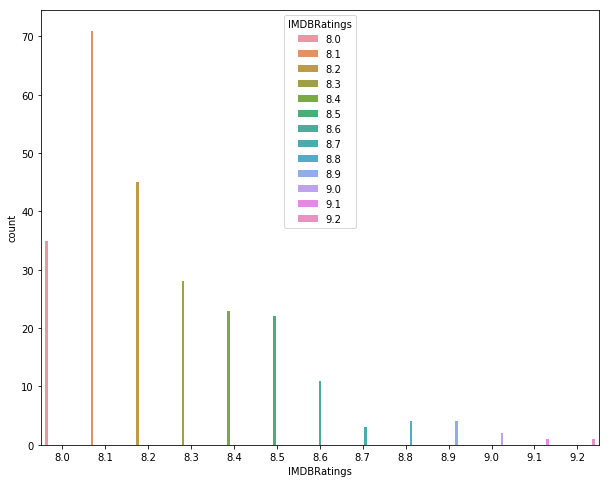

In [15]:
plt.figure(figsize=(10, 8))
sns.countplot(x='IMDBRatings', hue='IMDBRatings', data=df_final)

In [16]:
df_final.groupby(['IMDBRatings'])['IMDBRatings'].count()

IMDBRatings
8.0    35
8.1    71
8.2    45
8.3    28
8.4    23
8.5    22
8.6    11
8.7     3
8.8     4
8.9     4
9.0     2
9.1     1
9.2     1
Name: IMDBRatings, dtype: int64